##### LinkedIn: http://www.linkedin.com/in/mmohamed-anwar
##### GitHub: https://github.com/MuhammadAnwarBadat
##### Website: https://muhammadanwarportfolio.netlify.app/

## Exploratory Data Analysis on the Transaction Details Data

In [121]:
## importing necessary libraries

import pandas as pd
import numpy as np
import time,datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [123]:
## Loading data into the notebook

bykea_data = pd.read_csv('bq-results-20220118-174703-12xxzixt2fde.csv')

In [5]:
## Skimming through the data

bykea_data.head()
# bykea_data.iloc[190:200]
# bykea_data.iloc[14:19]

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687 UTC,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203 UTC,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209 UTC,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127 UTC,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613 UTC,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4


In [6]:
# Checking data types

bykea_data.dtypes

customer_id         object
acquired_by         object
acquired_date       object
transaction_time    object
product_code         int64
parent_region_id    object
value                int64
child_region_id     object
dtype: object

In [7]:
# Checking for nulll values

bykea_data.isnull().sum()

customer_id          0
acquired_by          0
acquired_date       70
transaction_time     0
product_code         0
parent_region_id     0
value                0
child_region_id      0
dtype: int64

In [124]:
# Cleaning and normalizing the date columns

bykea_data['acquired_date'] = bykea_data['acquired_date'].str.replace(' UTC', '', regex=False).str.split('.').str[0]
bykea_data['transaction_time'] = bykea_data['transaction_time'].str.split('.').str[0]

In [125]:
# Converting to datetime with consistent format

bykea_data['acquired_date'] = pd.to_datetime(bykea_data['acquired_date'], format="%Y-%m-%d %H:%M:%S")
bykea_data['transaction_time'] = pd.to_datetime(bykea_data['transaction_time'], format="%Y-%m-%d %H:%M:%S")

## Answering question 1 

#### Identify User based on Purchase Habits, Spending Ability.


## Spending Analysis:


#### A. Calculates total and average spending per customer and rounds the average spending to two decimal places.


In [129]:
# Calculate total spending per customer
total_spending_per_customer = bykea_data.groupby('customer_id')['value'].sum()

# Calculate average spending per transaction per customer
average_spending_per_customer = bykea_data.groupby('customer_id')['value'].mean()

# Merge the results into a single DataFrame
customer_spending_data = pd.DataFrame({
    'total_spending': total_spending_per_customer,
    'average_spending': average_spending_per_customer
})

# Round the 'average_spending' column to 2 decimal places
customer_spending_data['average_spending'] = customer_spending_data['average_spending'].round(2)

# Display the customer spending data
customer_spending_data.head()

,total_spending,average_spending
customer_id,,
00000219bc8b6c52e2590455d6dbacab,87,87.00
000008bd7350859ef3487c5a3b8f53d7,832,92.44
0000944d35ce0a9c9ee3b93e4e387762,3925,87.22
0001a919b0be58725b24354a75ca25dc,1435,79.72
0001d445db6f9278bfead370e3d50cd8,2061,98.14


#### B. Calculates and displays the highest, lowest, and average total spending across customers.


In [131]:
# Highest total spending
highest_spending = customer_spending_data['total_spending'].max()

# Lowest total spending
lowest_spending = customer_spending_data['total_spending'].min()

# Average total spending
average_spending = customer_spending_data['total_spending'].mean().round(2)

# Display the results
print("Highest Spending:", highest_spending)
print("Lowest Spending:", lowest_spending)
print("Average Spending:", average_spending)


Highest Spending: 47133
Lowest Spending: 0
Average Spending: 1278.31


#### C. Categorizes customers into spending bins (Low, Medium, High) based on their total spending and visualizes the distribution.


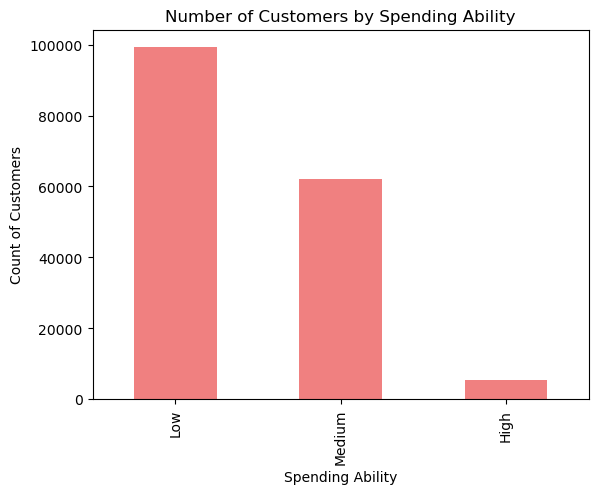

In [17]:
# Define custom spending thresholds
spending_bins = [0, 1000, 5000, customer_spending_data['total_spending'].max()]
spending_labels = ['Low', 'Medium', 'High']

# Categorize customers based on the thresholds
customer_spending_data['spending_ability'] = pd.cut(
    customer_spending_data['total_spending'], 
    bins=spending_bins, 
    labels=spending_labels
)

# Visualize the updated spending ability distribution
customer_spending_data['spending_ability'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Number of Customers by Spending Ability')
plt.xlabel('Spending Ability')
plt.ylabel('Count of Customers')
plt.show()

#### D. Provides overall metrics, such as total spending, average transaction value, and spending categories for customers.


In [19]:
# Total Spending per Customer
total_spending_per_customer = bykea_data.groupby('customer_id')['value'].sum()

# Average Spending per Transaction
average_spending_per_customer = bykea_data.groupby('customer_id')['value'].mean().round(2)

# Overall Metrics
total_spending = total_spending_per_customer.sum()  # Total spending by all customers
average_transaction_value = bykea_data['value'].mean().round(2)  # Average spending per transaction across all customers
total_customers = bykea_data['customer_id'].nunique()  # Total number of unique customers
total_transactions = bykea_data.shape[0]  # Total number of transactions

# Spending Categories (Low, Medium, High)
low_threshold = total_spending_per_customer.quantile(0.33)
high_threshold = total_spending_per_customer.quantile(0.66)

spending_bins = [0, low_threshold, high_threshold, total_spending_per_customer.max()]
spending_labels = ['Low', 'Medium', 'High']

# Assign spending categories to each customer
spending_categories = pd.cut(total_spending_per_customer, bins=spending_bins, labels=spending_labels)

# Spending Category Counts
spending_category_counts = spending_categories.value_counts()

# Purchase Frequency
purchase_frequency = bykea_data.groupby('customer_id')['transaction_time'].count()

# Average Purchase Frequency
average_purchase_frequency = purchase_frequency.mean().round(2)

# Display formatted numbers
def format_currency(value):
    return f"Rs {value:,.2f}"  # Format value as Rupees with commas

# Results Display
print("=== Purchase Habits and Spending Ability Metrics ===\n")
print(f"Total Spending (All Customers): {format_currency(total_spending)}")
print(f"Average Transaction Value: {format_currency(average_transaction_value)}")
print(f"Total Customers: {total_customers}")
print(f"Total Transactions: {total_transactions}\n")

print("=== Spending Categories ===")
print(f"Low Spending Customers: {spending_category_counts['Low']} (up to {format_currency(low_threshold)})")
print(f"Medium Spending Customers: {spending_category_counts['Medium']} (between {format_currency(low_threshold)} and {format_currency(high_threshold)})")
print(f"High Spending Customers: {spending_category_counts['High']} (above {format_currency(high_threshold)})\n")

print("=== Purchase Frequency ===")
print(f"Average Purchase Frequency (per Customer): {average_purchase_frequency} transactions")

=== Purchase Habits and Spending Ability Metrics ===

Total Spending (All Customers): Rs 213,176,614.00
Average Transaction Value: Rs 122.94
Total Customers: 166764
Total Transactions: 1734054

=== Spending Categories ===
Low Spending Customers: 55079 (up to Rs 415.00)
Medium Spending Customers: 54986 (between Rs 415.00 and Rs 1,233.00)
High Spending Customers: 56695 (above Rs 1,233.00)

=== Purchase Frequency ===
Average Purchase Frequency (per Customer): 10.4 transactions


#### E. Analyzes spending by acquisition channel (e.g., online or offline).

In [21]:
# Group by 'acquired_by' and calculate total spending
acquisition_spending = bykea_data.groupby('acquired_by')['value'].sum()

# Group by 'acquired_by' and calculate average spending per customer
acquisition_average_spending = bykea_data.groupby('acquired_by')['value'].mean().round(2)

# Merge the results into a DataFrame
acquisition_spending_data = pd.DataFrame({
    'total_spending': acquisition_spending,
    'average_spending': acquisition_average_spending
})

# Display the acquisition spending data
acquisition_spending_data

,total_spending,average_spending
acquired_by,,
OFFLINE,196291388,123.39
ONLINE,16885226,117.84


#### F. Visualizes total and average spending based on acquisition channel.


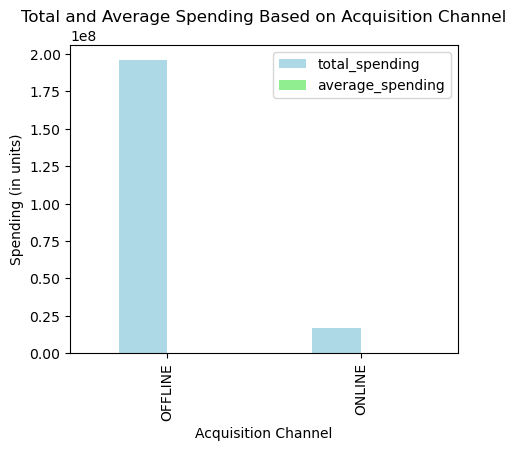

In [23]:
acquisition_spending_data.plot(kind='bar', figsize=(5,4), color=['lightblue', 'lightgreen'])
plt.title('Total and Average Spending Based on Acquisition Channel')
plt.xlabel('Acquisition Channel')
plt.ylabel('Spending (in units)')
plt.show()

#### G. Creates a pie chart showing the percentage of spending by online vs. offline customers.


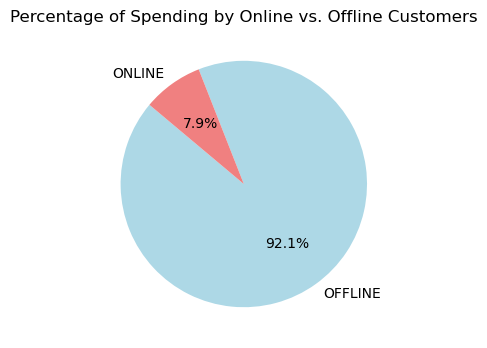

In [25]:
# Aggregate the spending by acquisition type (online vs. offline)
spending_by_acquisition = bykea_data.groupby('acquired_by')['value'].sum()

# Create a pie chart
spending_by_acquisition.plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                              colors=['lightblue', 'lightcoral'], figsize=(4, 4))
plt.title('Percentage of Spending by Online vs. Offline Customers')
plt.ylabel('')  # Remove the default y-axis label
plt.show()

#### H. Processes transaction data by day, month, and day of the week, followed by displaying transaction counts with bar charts.
 

Transactions by Day of the Week:
transaction_day_of_week
Friday       289819
Monday       284800
Saturday     225310
Sunday       121029
Thursday     293283
Tuesday      231368
Wednesday    288445
Name: count, dtype: int64

Transactions by Month:
transaction_month
10    1734054
Name: transaction_time, dtype: int64


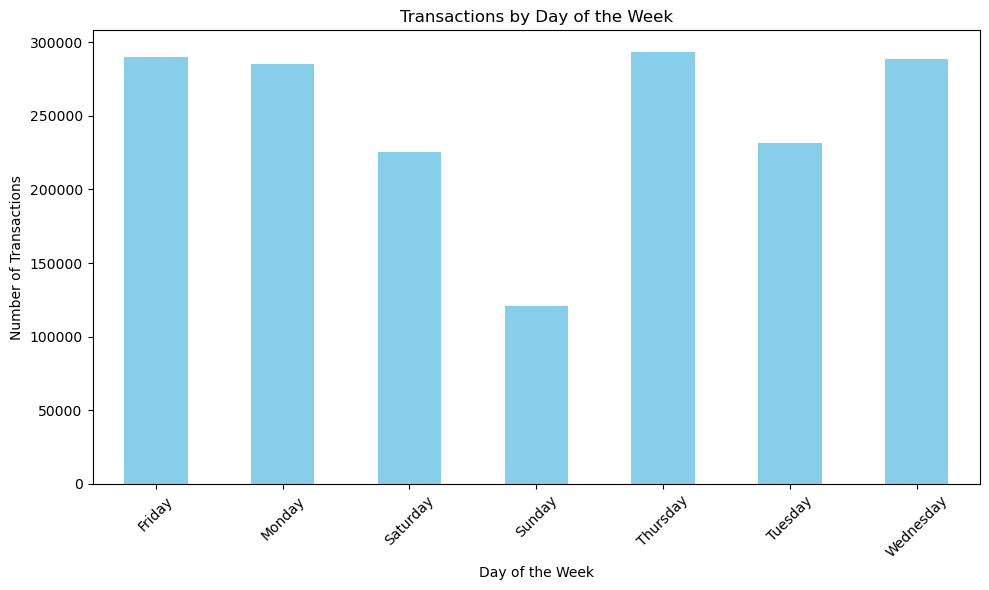

In [27]:
bykea_data['transaction_day'] = bykea_data['transaction_time'].dt.day
bykea_data['transaction_month'] = bykea_data['transaction_time'].dt.month
bykea_data['transaction_year'] = bykea_data['transaction_time'].dt.year
bykea_data['transaction_day_of_week'] = bykea_data['transaction_time'].dt.day_name()

transactions_by_day_of_week = bykea_data['transaction_day_of_week'].value_counts().sort_index()
transactions_by_month = bykea_data.groupby('transaction_month')['transaction_time'].count()

print("Transactions by Day of the Week:")
print(transactions_by_day_of_week)
print("")
print("Transactions by Month:")
print(transactions_by_month)

# 6.1: Bar Chart for Transactions by Day of the Week
plt.figure(figsize=(10,6))
transactions_by_day_of_week.plot(kind='bar', color='skyblue')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Customer Purchase Behavior:


#### H. Calculates purchase frequency and the average time between transactions for each customer, using days and converting them to hours.


In [30]:
# Calculate the number of transactions per customer
purchase_frequency = bykea_data.groupby('customer_id')['transaction_time'].count()

# Calculate the average time between transactions (assuming it's sorted by transaction time)
bykea_data = bykea_data.sort_values(by='transaction_time')
bykea_data['previous_transaction'] = bykea_data.groupby('customer_id')['transaction_time'].shift(1)
bykea_data['time_diff'] = (bykea_data['transaction_time'] - bykea_data['previous_transaction']).dt.days

# Convert time difference from days to hours
bykea_data['time_diff_hours'] = bykea_data['time_diff'] * 24

# Calculate average time between purchases per customer in hours
average_time_between_purchases_hours = bykea_data.groupby('customer_id')['time_diff_hours'].mean().round(2)

# Merge frequency and average time between purchases with the spending data
customer_behavior_data = pd.DataFrame({
    'purchase_frequency': purchase_frequency,
    'average_time_between_purchases (in hours)': average_time_between_purchases_hours
})

# Display the final dataset for customer behavior
customer_behavior_data.head()

,purchase_frequency,average_time_between_purchases (in hours)
customer_id,,
00000219bc8b6c52e2590455d6dbacab,1,NaN
000008bd7350859ef3487c5a3b8f53d7,9,15.00
0000944d35ce0a9c9ee3b93e4e387762,45,3.82
0001a919b0be58725b24354a75ca25dc,18,28.24
0001d445db6f9278bfead370e3d50cd8,21,16.80


#### I. Visualizes the relationship between purchase frequency and average spending using a scatter plot.


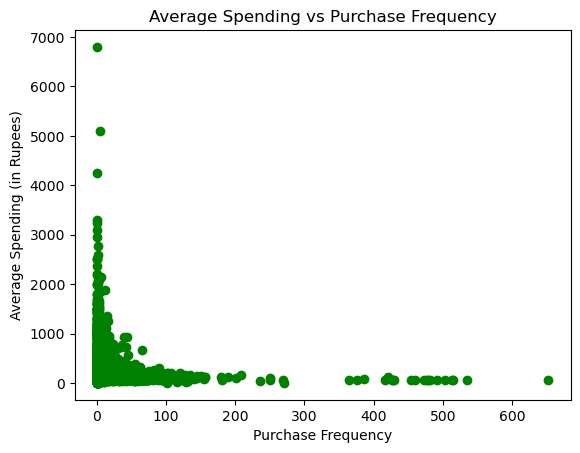

In [32]:
plt.scatter(customer_behavior_data['purchase_frequency'], customer_spending_data['average_spending'], color='green')
plt.title('Average Spending vs Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Average Spending (in Rupees)')
plt.show()

#### J. Displays a box plot showing the distribution of the average time between purchases.


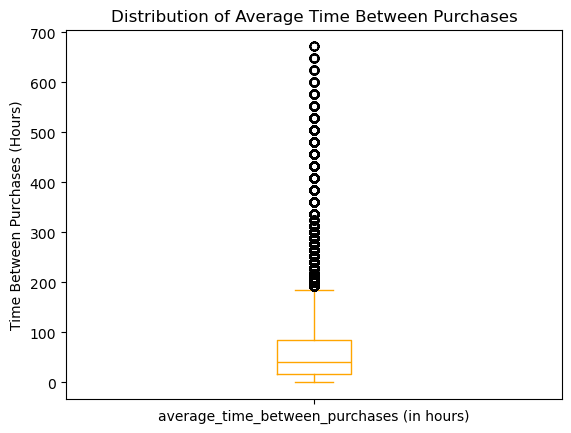

In [34]:
customer_behavior_data['average_time_between_purchases (in hours)'].plot(kind='box', color='orange')
plt.title('Distribution of Average Time Between Purchases')
plt.ylabel('Time Between Purchases (Hours)')
plt.show()

#### K. Analyzes customer churn (those with one purchase) and returning customers (more than one purchase).


In [36]:
# Calculate the number of purchases per customer
customer_purchase_count = bykea_data.groupby('customer_id')['transaction_time'].count()

# Churned customers: Customers with only one purchase
churned_customers = customer_purchase_count[customer_purchase_count == 1].count()

# Returning customers: Customers with more than one purchase
returning_customers = customer_purchase_count[customer_purchase_count > 1].count()

# Total customers: Unique customer count
total_customers = customer_purchase_count.count()

# Display the results in a beautified format
print(f"Total Number of Customers: {total_customers:,}")
print(f"Churned Customers (Only one purchase): {churned_customers:,}")
print(f"Returning Customers (More than one purchase): {returning_customers:,}")

Total Number of Customers: 166,764
Churned Customers (Only one purchase): 23,619
Returning Customers (More than one purchase): 143,145


#### L. Counts the number of times each product is purchased and displays the top 5 most frequently bought products.


In [38]:
# Count the number of times each product_code is bought
product_sales = bykea_data['product_code'].value_counts()

# Display the total number of unique products
total_products = product_sales.count()

# Get the top 5 most frequently bought products
top_5_products = product_sales.head(5)

# Display the results
print(f"Total number of unique products: {total_products}")
print("\nTop 5 Most Frequently Bought Products:")
print(top_5_products)

Total number of unique products: 13

Top 5 Most Frequently Bought Products:
product_code
78    1646678
76      42626
88      19844
80       8917
90       7488
Name: count, dtype: int64


#### M. Beautifies and formats the display of the top 5 most frequently bought products.

In [40]:
# Count the number of times each product_code is bought
product_sales = bykea_data['product_code'].value_counts()

# Total number of unique products
total_products = product_sales.count()

# Get the top 5 most frequently bought products
top_5_products = product_sales.head(5)

# Beautify the output
print(f"Total Number of Unique Products: {total_products:,}\n")

# Display the top 5 most frequently bought products with a clearer format
print("Top 5 Most Frequently Bought Products (Product Code and Number of Purchases):\n")
print(f"{'Product Code':<15}{'Total Purchases':<20}")
print("="*35)

# Format the output for the top 5 products
for product, count in top_5_products.items():
    print(f"{product:<15}{count:,.0f}")

Total Number of Unique Products: 13

Top 5 Most Frequently Bought Products (Product Code and Number of Purchases):

Product Code   Total Purchases     
78             1,646,678
76             42,626
88             19,844
80             8,917
90             7,488


## Answering question 2

#### Region Based analysis of Transactions and Users.

## Regional Analysis:


#### A. Counts the number of unique customers in parent and child regions.


In [44]:
# Count number of customers per parent region
parent_region_customer_count = bykea_data['parent_region_id'].nunique()

# Count number of customers per child region (removing duplicates)
child_region_customer_count = bykea_data['child_region_id'].nunique()

print(f"Total Unique Customers in Parent Regions: {parent_region_customer_count}")
print(f"Total Unique Customers in Child Regions: {child_region_customer_count}")

Total Unique Customers in Parent Regions: 3
Total Unique Customers in Child Regions: 202


#### B. Calculates and displays total spending by parent and child region.


In [46]:
# Calculate total spending by parent region
total_spending_parent_region = bykea_data.groupby('parent_region_id')['value'].sum()

# Calculate total spending by child region
total_spending_child_region = bykea_data.groupby('child_region_id')['value'].sum()

# Display the results
print("Total Spending by Parent Region:")
print(total_spending_parent_region.sort_values(ascending=False))

print("\nTotal Spending by Child Region:")
print(total_spending_child_region.sort_values(ascending=False))

Total Spending by Parent Region:
parent_region_id
07B    148217757
1EF     44716809
300     20242048
Name: value, dtype: int64

Total Spending by Child Region:
child_region_id
EEDD0125ADF9CD4325E56C39462533F5    20568785
294B021232C509826A57AC3136B8ABDD    15367254
4E8E60427140A514537C374BAA698D32    14528782
EE735FFED3A6072D13A30636E658A03A    14135483
10D023CEE6CC12F06C576EB33402E56B    13221492
                                      ...   
8446F3B4AF825FD2A6A2FC99198CF390          40
17C591493A92D9F1F66B4EF75AB68130          30
BDD4149257B464AF1B8423FF897A6068          25
EB181518B61F6693D9937083720AE116          10
D9B12FA86317AF9ABCF01ECBEEE196CB           5
Name: value, Length: 202, dtype: int64


#### C. Calculates and displays the average spending by parent and child region.


In [48]:
# Calculate average spending by parent region
average_spending_parent_region = bykea_data.groupby('parent_region_id')['value'].mean().round(2)

# Calculate average spending by child region
average_spending_child_region = bykea_data.groupby('child_region_id')['value'].mean().round(2)

# Display the results
print("Average Spending by Parent Region:")
print(average_spending_parent_region.sort_values(ascending=False))

print("\nAverage Spending by Child Region:")
print(average_spending_child_region.sort_values(ascending=False))

Average Spending by Parent Region:
parent_region_id
07B    126.28
1EF    120.78
300    106.49
Name: value, dtype: float64

Average Spending by Child Region:
child_region_id
2BCE66AB4E10614E7DE823C16315451B    775.50
F45A30D0A5842021BC75834EE8F3600E    389.00
B0114B6650D633C1C2E75E9D86DE766C    313.42
6B6D4E4CF22D8D2394371703CDE6DC11    313.33
6ACE4E3F5521EC813FD8770E2ADB03EC    300.60
                                     ...  
A2C05EBEC62E1CF3E8C593664C3F87FA     13.29
EB181518B61F6693D9937083720AE116     10.00
17C591493A92D9F1F66B4EF75AB68130     10.00
BDD4149257B464AF1B8423FF897A6068      8.33
D9B12FA86317AF9ABCF01ECBEEE196CB      5.00
Name: value, Length: 202, dtype: float64


#### D. Analyzes purchase frequency by region (parent vs. child).


In [50]:
# Calculate the number of transactions per customer per parent region
purchase_frequency_parent_region = bykea_data.groupby('parent_region_id')['transaction_time'].count()

# Calculate the number of transactions per customer per child region
purchase_frequency_child_region = bykea_data.groupby('child_region_id')['transaction_time'].count()

# Display the results
print("Purchase Frequency by Parent Region:")
print(purchase_frequency_parent_region.sort_values(ascending=False))

print("\nPurchase Frequency by Child Region:")
print(purchase_frequency_child_region.sort_values(ascending=False))

Purchase Frequency by Parent Region:
parent_region_id
07B    1173715
1EF     370247
300     190092
Name: transaction_time, dtype: int64

Purchase Frequency by Child Region:
child_region_id
EEDD0125ADF9CD4325E56C39462533F5    180799
294B021232C509826A57AC3136B8ABDD    129369
4E8E60427140A514537C374BAA698D32    119589
10D023CEE6CC12F06C576EB33402E56B    114134
EE735FFED3A6072D13A30636E658A03A    112160
                                     ...  
B100F4CD33C165F9DFE5C9ED083042C7         1
D9B12FA86317AF9ABCF01ECBEEE196CB         1
2E6F3BBBC4AB1BAD4C9263806E087970         1
BC39F3E3591984F939064D0502C99FA3         1
BC1208810827580CDB394793769097B6         1
Name: transaction_time, Length: 202, dtype: int64


#### E. Identifies the top 5 parent and child regions based on total spending.


In [52]:
# Top 5 parent regions by total spending
top_5_parent_regions = total_spending_parent_region.sort_values(ascending=False).head(5)

# Top 5 child regions by total spending
top_5_child_regions = total_spending_child_region.sort_values(ascending=False).head(5)

print("Top 5 Parent Regions Based on Total Spending:")
print(top_5_parent_regions)

print("\nTop 5 Child Regions Based on Total Spending:")
print(top_5_child_regions)

Top 5 Parent Regions Based on Total Spending:
parent_region_id
07B    148217757
1EF     44716809
300     20242048
Name: value, dtype: int64

Top 5 Child Regions Based on Total Spending:
child_region_id
EEDD0125ADF9CD4325E56C39462533F5    20568785
294B021232C509826A57AC3136B8ABDD    15367254
4E8E60427140A514537C374BAA698D32    14528782
EE735FFED3A6072D13A30636E658A03A    14135483
10D023CEE6CC12F06C576EB33402E56B    13221492
Name: value, dtype: int64


#### F. Aggregates total spending by parent region and visualizes it in a horizontal bar chart.


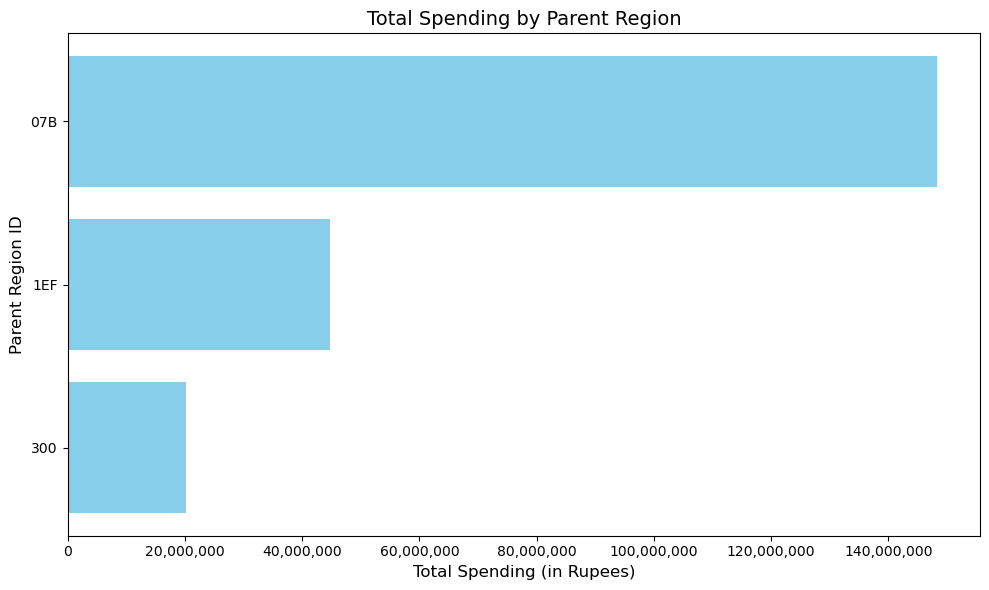

In [54]:
# Grouping by 'parent_region_id' and calculating the total spending
total_spending_parent_region = bykea_data.groupby('parent_region_id')['value'].sum().sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(total_spending_parent_region.index, total_spending_parent_region.values, color='skyblue')

# Adding labels and title
plt.xlabel('Total Spending (in Rupees)', fontsize=12)
plt.ylabel('Parent Region ID', fontsize=12)
plt.title('Total Spending by Parent Region', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Displaying comma-separated values for x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Show the plot
plt.tight_layout()
plt.show()

#### G. Aggregates total spending by child region, applying a threshold to categorize minor contributors as "Others" and visualizing the data in a bar chart.


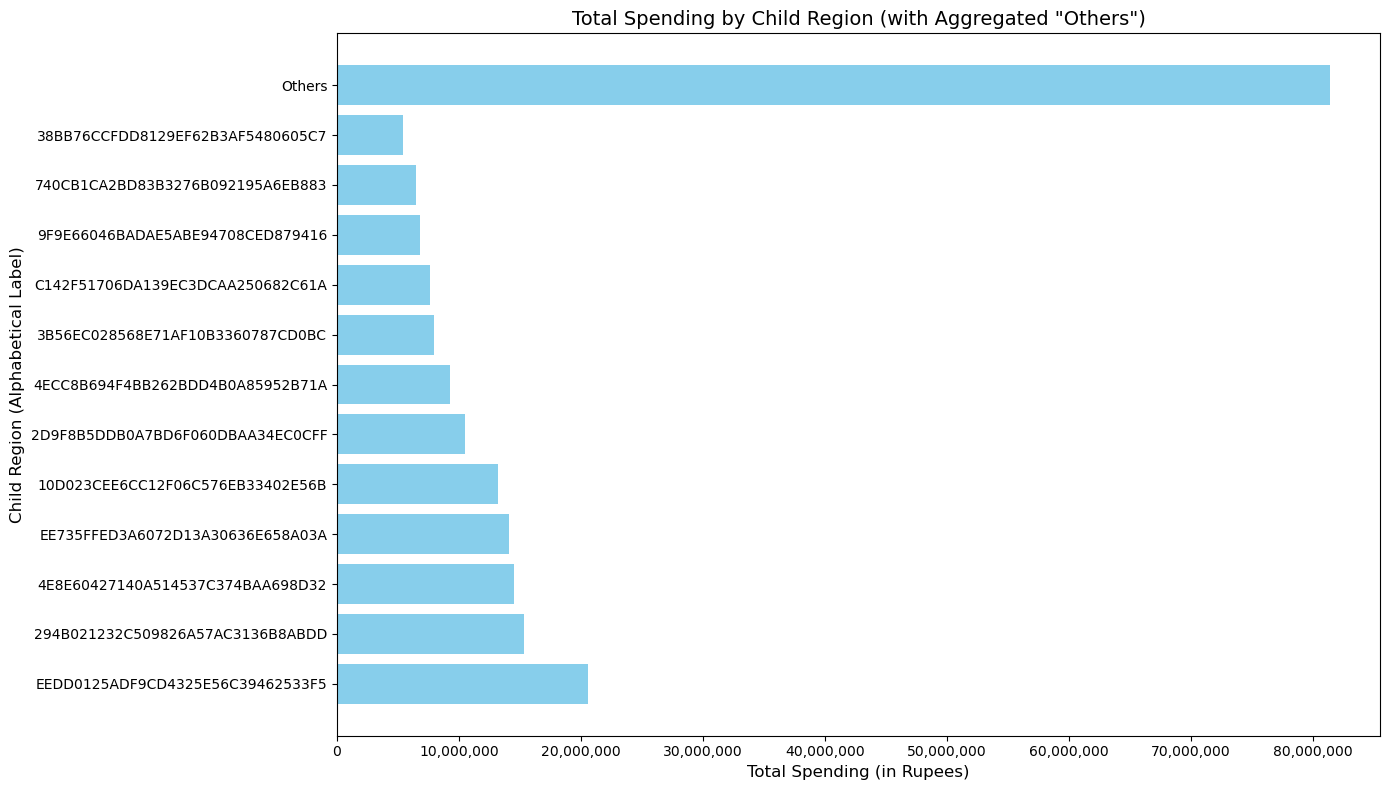

In [56]:
# Set a threshold for 'Others' category (e.g., regions contributing less than 2% of total spending)
total_spending_child_region = bykea_data.groupby('child_region_id')['value'].sum().sort_values(ascending=False)
threshold = 0.02 * total_spending_child_region.sum()

# Separate major and minor contributors
major_regions = total_spending_child_region[total_spending_child_region >= threshold]
minor_regions = total_spending_child_region[total_spending_child_region < threshold]

# Combine minor regions into 'Others'
aggregated_data = major_regions.copy()
aggregated_data['Others'] = minor_regions.sum()

# Plot the aggregated bar chart
plt.figure(figsize=(14, 8))
plt.barh(aggregated_data.index, aggregated_data.values, color='skyblue')

# Adding labels and title
plt.xlabel('Total Spending (in Rupees)', fontsize=12)
plt.ylabel('Child Region (Alphabetical Label)', fontsize=12)
plt.title('Total Spending by Child Region (with Aggregated "Others")', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Displaying comma-separated values for x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Adjust layout
plt.tight_layout()
plt.show()


#### H. Extracts and visualizes the top N (e.g., top 20) child regions by total spending in a horizontal bar chart.
 

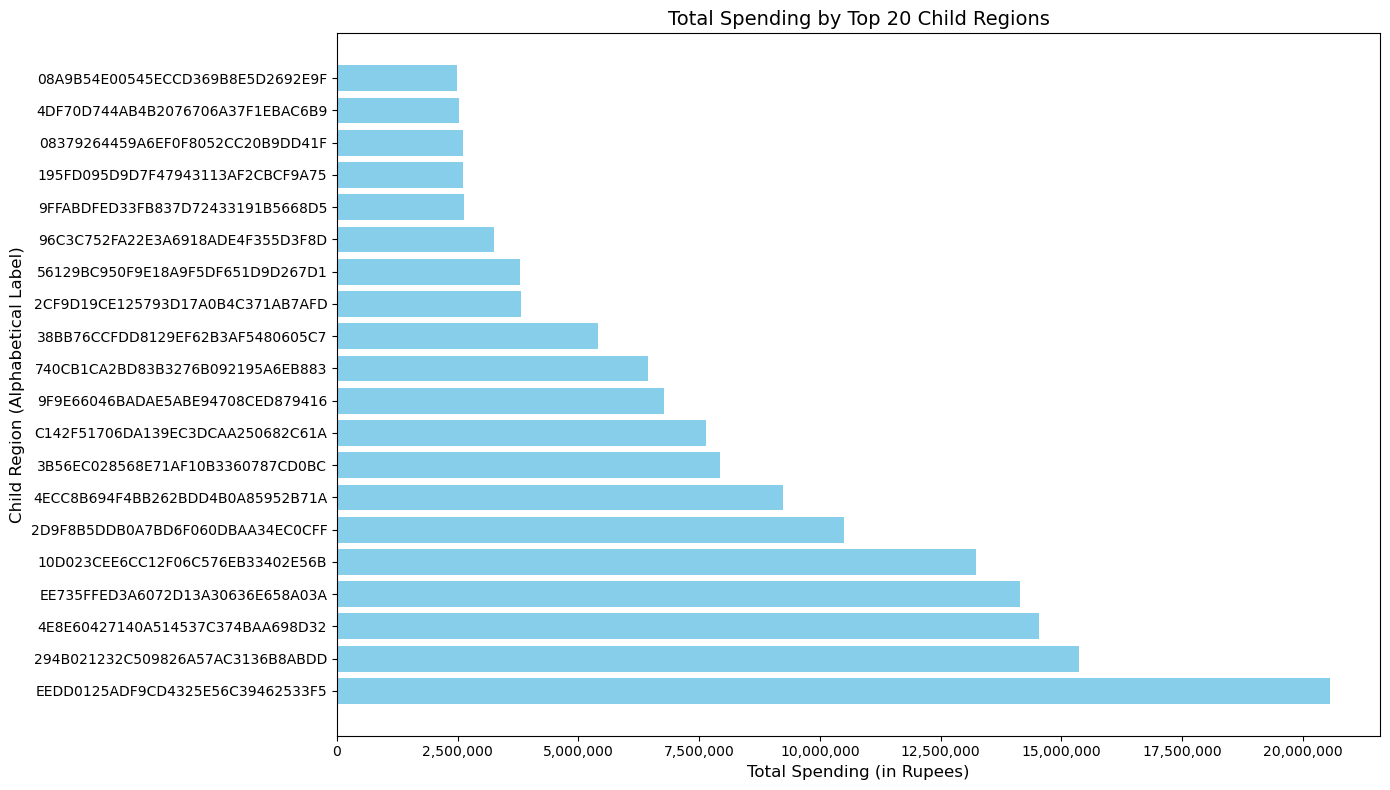

In [58]:
# Extract top N regions (e.g., top 20)
top_n = 20
top_regions = total_spending_child_region.head(top_n)

# Plot the bar chart for the top regions
plt.figure(figsize=(14, 8))
plt.barh(top_regions.index, top_regions.values, color='skyblue')

# Adding labels and title
plt.xlabel('Total Spending (in Rupees)', fontsize=12)
plt.ylabel('Child Region (Alphabetical Label)', fontsize=12)
plt.title(f'Total Spending by Top {top_n} Child Regions', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Displaying comma-separated values for x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Adjust layout
plt.tight_layout()
plt.show()

#### I. Calculates and visualizes the number of unique customers per parent region.


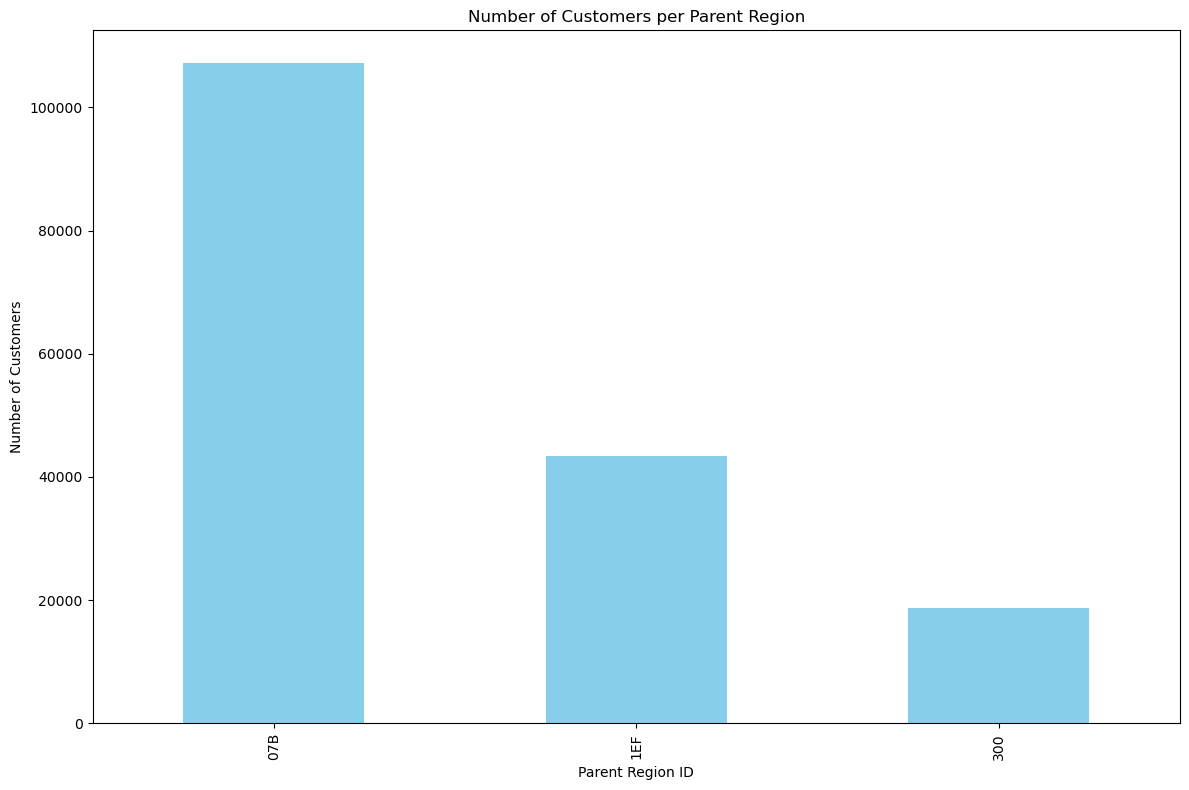

In [60]:
# Number of unique customers per parent region
customers_per_parent_region = bykea_data.groupby('parent_region_id')['customer_id'].nunique()

# Create a Bar Chart for Parent Region
plt.figure(figsize=(12, 8))
customers_per_parent_region.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Customers per Parent Region')
plt.xlabel('Parent Region ID')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### J. Calculates and visualizes the number of unique customers per child region for the top 20 regions.


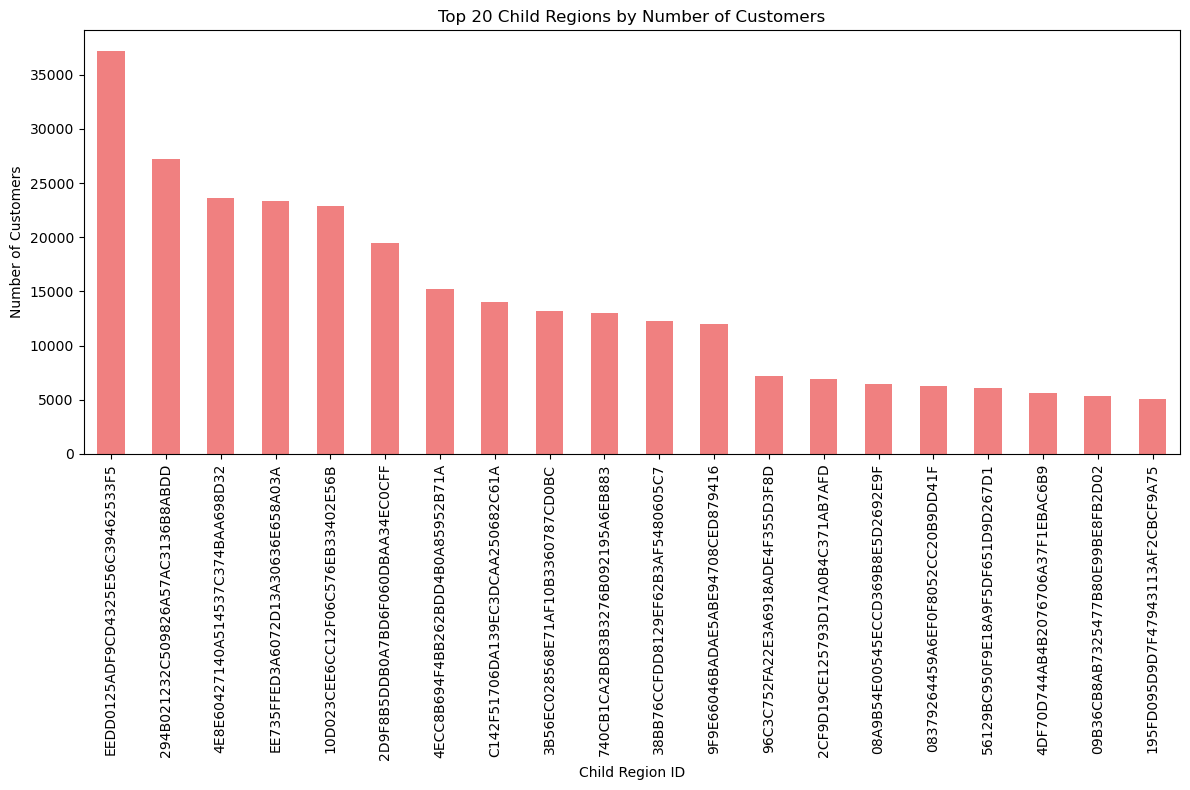

In [62]:
# Number of unique customers per child region (Top 20)
customers_per_child_region = bykea_data.groupby('child_region_id')['customer_id'].nunique()
top_20_customers_per_child_region = customers_per_child_region.nlargest(20)


# Create a Bar Chart for Top 20 Child Regions
plt.figure(figsize=(12, 8))
top_20_customers_per_child_region.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
plt.title('Top 20 Child Regions by Number of Customers')
plt.xlabel('Child Region ID')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Customer Acquisition & Insights:


#### A. Counts the number of customers acquired online vs. offline and displays the result.


In [65]:
# Count the number of unique customers acquired Online and Offline
acquired_customers = bykea_data.groupby('acquired_by')['customer_id'].nunique()

# Display the results
print("=== Number of Customers Acquired Online vs Offline ===")
print(f"Online Customers: {acquired_customers.get('ONLINE', 0)}")
print(f"Offline Customers: {acquired_customers.get('OFFLINE', 0)}")

=== Number of Customers Acquired Online vs Offline ===
Online Customers: 12115
Offline Customers: 154649


#### B. Begins to analyze customer purchase counts in each region, though it's not fully visible.


In [67]:
# Calculate number of purchases per customer for each parent region
customer_purchase_count_parent_region = bykea_data.groupby('parent_region_id')['customer_id'].nunique()

# Calculate churned and returning customers by parent region
churned_customers_parent_region = customer_purchase_count_parent_region[customer_purchase_count_parent_region == 1].count()
returning_customers_parent_region = customer_purchase_count_parent_region[customer_purchase_count_parent_region > 1].count()

# Calculate number of purchases per customer for each child region
customer_purchase_count_child_region = bykea_data.groupby('child_region_id')['customer_id'].nunique()

# Calculate churned and returning customers by child region
churned_customers_child_region = customer_purchase_count_child_region[customer_purchase_count_child_region == 1].count()
returning_customers_child_region = customer_purchase_count_child_region[customer_purchase_count_child_region > 1].count()

# Display the results
print(f"Churned Customers (Parent Region): {churned_customers_parent_region}")
print(f"Returning Customers (Parent Region): {returning_customers_parent_region}")
print(f"Churned Customers (Child Region): {churned_customers_child_region}")
print(f"Returning Customers (Child Region): {returning_customers_child_region}")

Churned Customers (Parent Region): 0
Returning Customers (Parent Region): 3
Churned Customers (Child Region): 18
Returning Customers (Child Region): 184


In [105]:
bykea_data.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,transaction_year,transaction_day_of_week,previous_transaction,time_diff,time_diff_hours
230618,f94d51f9d80529a8862647e56149565c,OFFLINE,2019-06-13 07:36:24,2021-10-01 00:23:32,78,300,78,09B36CB8AB7325477B80E99BE8FB2D02,1,10,2021,Friday,NaT,NaN,NaN
1056517,c96cd71bab7d93d42fff7b9f24b74bf0,OFFLINE,2020-06-22 16:31:18,2021-10-01 00:25:43,78,1EF,81,740CB1CA2BD83B3276B092195A6EB883,1,10,2021,Friday,NaT,NaN,NaN
1390476,2351f6e449a954210c1a51ad75ac7f1e,OFFLINE,2021-01-22 15:17:35,2021-10-01 00:26:39,78,300,68,D3CEA8B57F07B785543EDB2058A190CE,1,10,2021,Friday,NaT,NaN,NaN
667045,b8d4ad51fce93d91ed40d18492196fd7,OFFLINE,2019-09-30 03:33:44,2021-10-01 00:29:08,78,1EF,77,38BB76CCFDD8129EF62B3AF5480605C7,1,10,2021,Friday,NaT,NaN,NaN
55414,3e6cd81d8cd1caee886b0797683ad3ae,OFFLINE,2019-03-02 02:34:56,2021-10-01 00:30:57,78,1EF,82,F23ABF889C244499ACA33B5CE1A7C848,1,10,2021,Friday,NaT,NaN,NaN


In [107]:
# Saving the resultant dataset
bykea_data.to_csv('resultant_dataset.csv', index=False)


## Task 3 Creating ML Predictor

## Step 1: Data Preparation

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

In [134]:
df = pd.read_csv('bq-results-20220118-174703-12xxzixt2fde.csv')

# Clean and normalize the date columns
df['acquired_date'] = df['acquired_date'].str.replace(' UTC', '', regex=False).str.split('.').str[0]
df['transaction_time'] = df['transaction_time'].str.split('.').str[0]

# Convert to datetime with consistent format
df['acquired_date'] = pd.to_datetime(df['acquired_date'], format="%Y-%m-%d %H:%M:%S")
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format="%Y-%m-%d %H:%M:%S")

# Ensure your 'acquired_date' is in datetime format
df['acquired_date'] = pd.to_datetime(df['acquired_date'])

# Extracting time-related features
df['acquisition_hour'] = df['acquired_date'].dt.hour
df['acquisition_day'] = df['acquired_date'].dt.day
df['acquisition_month'] = df['acquired_date'].dt.month
df['acquisition_year'] = df['acquired_date'].dt.year
df['acquisition_day_of_week'] = df['acquired_date'].dt.day_name()

In [140]:
# Selecting relevant features
features = df[['acquisition_hour', 'acquisition_day', 'acquisition_month',
               'acquisition_year', 'acquisition_day_of_week', 'value', 'acquired_by']]

# One-hot encode 'acquisition_day_of_week' and 'acquired_by'
features = pd.get_dummies(features, columns=['acquisition_day_of_week', 'acquired_by'])

# Normalize continuous features
scaler = StandardScaler()
features[['acquisition_hour', 'acquisition_day', 'acquisition_month', 'acquisition_year', 'value']] = scaler.fit_transform(features[['acquisition_hour', 'acquisition_day', 'acquisition_month', 'acquisition_year', 'value']])

# Check the transformed data
features.head()

from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Check again if there are any missing values
print(pd.DataFrame(features_imputed).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [142]:
# Drop unnecessary columns
df.drop(['customer_id', 'acquired_date', 'transaction_time', 'product_code', 'acquisition_day_of_week'], axis=1, inplace=True)

# Handle missing values (drop or impute)
df.dropna(inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['parent_region_id', 'acquired_by'], drop_first=True)

# Frequency encoding for high cardinality categorical features
child_region_freq = df['child_region_id'].value_counts(normalize=True)
df['child_region_encoded'] = df['child_region_id'].map(child_region_freq)
df.drop(['child_region_id'], axis=1, inplace=True)

# Label creation (e.g., sticky customers: value > 90th percentile)
df['sticky_customer'] = (df['value'] > df['value'].quantile(0.9)).astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['value', 'acquisition_hour', 'acquisition_day', 'acquisition_month', 'acquisition_year']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Define features and target
X = df.drop(['sticky_customer'], axis=1)
y = df['sticky_customer']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preparation Complete. Ready for model training!")


Data Preparation Complete. Ready for model training!


## Step 2: Model Training


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [146]:
# Initialize Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    312530
           1       1.00      1.00      1.00     34267

    accuracy                           1.00    346797
   macro avg       1.00      1.00      1.00    346797
weighted avg       1.00      1.00      1.00    346797



## Step 3: Predictor App Backend

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def predict_sticky_users(csv_file):
    # Load the trained model
    model = joblib.load('sticky_customer_predictor.pkl')
    
    # Load new data from the provided CSV file
    df = pd.read_csv(csv_file)
    
    # Clean and normalize the date columns
    df['acquired_date'] = df['acquired_date'].str.replace(' UTC', '', regex=False).str.split('.').str[0]
    df['transaction_time'] = df['transaction_time'].str.split('.').str[0]
    
    # Convert to datetime with consistent format
    df['acquired_date'] = pd.to_datetime(df['acquired_date'], format="%Y-%m-%d %H:%M:%S")
    df['transaction_time'] = pd.to_datetime(df['transaction_time'], format="%Y-%m-%d %H:%M:%S")
    
    # Extract time-related features
    df['acquisition_hour'] = df['acquired_date'].dt.hour
    df['acquisition_day'] = df['acquired_date'].dt.day
    df['acquisition_month'] = df['acquired_date'].dt.month
    df['acquisition_year'] = df['acquired_date'].dt.year
    df['acquisition_day_of_week'] = df['acquired_date'].dt.day_name()
    
    # Select relevant features
    features = df[['acquisition_hour', 'acquisition_day', 'acquisition_month',
                   'acquisition_year', 'acquisition_day_of_week', 'value', 'acquired_by']]
    
    # One-hot encode categorical columns
    features = pd.get_dummies(features, columns=['acquisition_day_of_week', 'acquired_by'])
    
    # Normalize continuous features
    scaler = StandardScaler()
    features[['acquisition_hour', 'acquisition_day', 'acquisition_month', 'acquisition_year', 'value']] = scaler.fit_transform(features[['acquisition_hour', 'acquisition_day', 'acquisition_month', 'acquisition_year', 'value']])
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)
    
    # Ensure feature alignment with the trained model
    required_columns = model.feature_names_in_
    for col in required_columns:
        if col not in features_imputed:
            features_imputed[col] = 0  # Add missing columns with default values

    features_imputed = features_imputed[required_columns]  # Match order

    # Make predictions
    predictions = model.predict(features_imputed)
    df['is_sticky'] = predictions

    # Save predictions to a new CSV file
    output_file = 'predicted_sticky_users.csv'
    df.to_csv(output_file, index=False)
    print(f"Predictions saved to '{output_file}'")

In [ ]:
predict_sticky_users('new_users_data.csv')